In [900]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_X_y

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler  # балансировка классов
from imblearn.pipeline import Pipeline # используем из-за чуждой балансировки

from collections import Counter

import seaborn as sns
import math

import pickle

from ftplib import FTP 
import time
from datetime import datetime as dt

### Начало!!

#### При подготовке в продакт, сделать принудительный путь через os.path?

In [901]:
#df = pd.read_csv('post_07_10_2020_1.csv', sep=';')
#df = pd.read_csv('Ispytat_28_01_2021_1_year.csv', sep=';')
#df = pd.read_csv('Ispytat_18_02_2021_1_year.csv', sep=';')
#df = pd.read_csv('BAL_26_03_2021_year.csv', sep=';')
#df = pd.read_csv('LIN_31_03_2021_year.csv', sep=';')
#df = pd.read_csv('BAL_01_04_2021_year.csv', sep=';')
#df = pd.read_csv('GAT_02_04_2021_year.csv', sep=';')
#df = pd.read_csv('KOL_05_04_2021_year.csv', sep=';')
#df = pd.read_csv('LEN_06-04-2021.csv', sep=';')
df = pd.read_csv('LIG_13-04-2021.csv', sep=';')


C:\Users\A.Mochalov\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [902]:
df['Артикул'] = df['Артикул'].apply(pd.to_numeric, errors='coerce')

In [903]:
#ind = df['Артикул'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna().index

In [904]:
#ind

In [905]:
#df = df.iloc[ind, :]

In [906]:
#df[df['Артикул'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna().index]

In [907]:
df

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
0,1,612807.0,Б/00106004,NaN,<Объект не найден> (71:a2f0002590e2e24b11eb50b...,"1178 Набор для творчества Велюрики ""Совушка""11см",шт,шт,1.0,1.0,...,0,12.0,Удалить,B,NaN,90.72,0,0.0,0.0,Лобжина Виктория Шамхорбековна(ИП)
1,2,NaN,_Б/00112253,NaN,NaN,xxx,шт,NaN,1.0,1.0,...,0,0.0,Новинка,NaN,NaN,0.00,0,0.0,0.0,Котляр Мария Марковна
2,3,614907.0,Б/00113850,NaN,<>,Нить для ремонта и пошива джинс. изделий 200м ...,упак,упак,1.0,1.0,...,0,0.0,Новинка,NaN,NaN,52.50,0,0.0,0.0,ТД НИТ-КА ООО
3,4,614895.0,Б/00113838,NaN,<>,Нить оверлочная ассорти №1 300м 5шт/упак,упак,упак,1.0,1.0,...,0,0.0,Новинка,NaN,NaN,42.00,0,0.0,0.0,ТД НИТ-КА ООО
4,5,167010.0,00000023818,NaN,"ООО ""Арт-Пак""","R42 Вешалка пластиковая, черная, 42 см",шт,шт,150.0,1.0,...,0,150.0,Регулярный,NaN,A,29.05,0,0.0,0.0,Арт-Пак-М ООО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50809,50810,494006.0,02/00041046,NaN,"яХолнитены, гвозди для холнитенов, винты, закл...",68562 Хольнитен сумоч д-9мм чернен.двухсторонн...,шт,шт,50.0,1.0,...,5,200.0,Удалить,NaN,NaN,1.19,0,0.0,0.0,ПРОТОС и К ООО
50810,50811,494037.0,02/00041077,NaN,"яХолнитены, гвозди для холнитенов, винты, закл...",69146 Винт кобурный d-6мм ч.ник.мет ГР,шт,шт,50.0,1.0,...,0,0.0,Удалить,NaN,NaN,15.96,0,0.0,0.0,ПРОТОС и К ООО
50811,50812,494042.0,02/00041082,NaN,"яХолнитены, гвозди для холнитенов, винты, закл...",69222 Хольнитен сумоч д-9мм т.сереб. двухсторо...,шт,шт,1.0,1.0,...,0,0.0,Удалить,NaN,NaN,1.16,0,0.0,0.0,ПРОТОС и К ООО
50812,50813,494043.0,02/00041083,NaN,"яХолнитены, гвозди для холнитенов, винты, закл...",69223 Хольнитен сумоч д-8мм т.сереб. двухсторо...,шт,шт,1.0,1.0,...,0,0.0,Удалить,NaN,NaN,0.99,0,0.0,0.0,ПРОТОС и К ООО


In [908]:
df[df['Артикул']==415019] # быстрая оценка значений классов:

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
846,847,415019.0,00000071726,22.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,1.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
847,848,415019.0,00000071726,23.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,2.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
848,849,415019.0,00000071726,24.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,12.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
849,850,415019.0,00000071726,25.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,33.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
850,851,415019.0,00000071726,26.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,2.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
851,852,415019.0,00000071726,46.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,1.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
852,853,415019.0,00000071726,28.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,6.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
853,854,415019.0,00000071726,29.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,0,13.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
854,855,415019.0,00000071726,30.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,3,17.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма
855,856,415019.0,00000071726,32.0,Этикетки разные,Этикетка 10*20мм. NWA бел. 100шт. (размер),упак,упак,1.0,1.0,...,3,27.0,Регулярный,NaN,C,10.08,0,0.0,0.0,ФИДЕЯ фирма


In [909]:
#df = df[(df['Артикул'].astype(str).str[0] != 'Н') & (df['Артикул'].astype(str).str[0] != 'С') &\
#       (df['Артикул'].astype(str).str[0] != 'К') & (df['Артикул'].astype(str).str[0] != 'N')] # удаляем артикулы, начинающиеся с "H" и "С"

In [911]:
df['КоэффициентЕдиницы'].unique()

array([  1.  ,   4.  , 100.  ,  10.  ,  50.  ,   5.  ,  72.  ,  36.  ,
        25.  ,  20.  ,   2.  ,   8.  ,   3.  ,  15.  ,  12.  ,   5.5 ,
       144.  ,   6.  ,  81.  ,   6.74])

In [912]:
df[df['ЗначениеТочкиЗаказа']==27.42] #быстрая оценка признаков

,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик


In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50814 entries, 0 to 50813
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   НомерСтроки                             50814 non-null  int64  
 1   Артикул                                 50741 non-null  float64
 2   Код                                     50814 non-null  object 
 3   КодХарактеристики                       30972 non-null  float64
 4   ГруппаНоменклатуры                      50813 non-null  object 
 5   Номенклатура                            50814 non-null  object 
 6   ЕдиницаИзмерения                        50814 non-null  object 
 7   БазоваяЕдиницаИзмеренияАйриса           50746 non-null  object 
 8   ОптоваяФасовкаАйрис                     50814 non-null  float64
 9   КоэффициентЕдиницы                      50814 non-null  float64
 10  СредниеПродажи                          50814 non-null  fl

#### Начинаем работу со строками:

In [914]:
df.drop(['КоэффициентМинимальнойПоставкиИзлишков',
         'БазоваяЕдиницаИзмеренияАйриса'], axis=1, inplace=True)

In [915]:
df.dropna(subset=['Артикул', 'СтатусТовараАйриса', 'ЕдиницаИзмерения', 'ОптоваяФасовкаАйрис', 
                  'КоэффициентЕдиницы', 'Цена', 'ЗакупочнаяЦена', 'ОсновнойПоставщик'], inplace=True) # подумать насчет СтатусТовараАйриса

In [916]:
ind_for_drop = df[(df['СредниеПродажи'].isna() & df['КоличествоСделок'] > 0)
                  | (df['ЗакупкаЗаПериод'] < 0) | (df['ПроданоВсего'] < 0)
                  | (df['СтатусТовараАйриса'] == 'Исключенный')].index
df_1 = df.drop(list(ind_for_drop))  #### удалить строчки, в ктр средние продажи = 0, а кол-во сделок> 0 и т.д.

In [917]:
df_1[['КодХарактеристики', 'Артикул']] = df_1[['КодХарактеристики', 'Артикул']].astype(dtype='Int32')

In [918]:
df_1.loc[df['МинимальныйСтраховойЗапас'] < 1, 'МинимальныйСтраховойЗапас'] = 0.001 # приводим все мин ктр меньше 1 к одному числу

In [919]:
len(list(ind_for_drop))

1535

In [920]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49151 entries, 0 to 50813
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49151 non-null  int64  
 1   Артикул                    49151 non-null  Int32  
 2   Код                        49151 non-null  object 
 3   КодХарактеристики          29931 non-null  Int32  
 4   ГруппаНоменклатуры         49151 non-null  object 
 5   Номенклатура               49151 non-null  object 
 6   ЕдиницаИзмерения           49151 non-null  object 
 7   ОптоваяФасовкаАйрис        49151 non-null  float64
 8   КоэффициентЕдиницы         49151 non-null  float64
 9   СредниеПродажи             49151 non-null  float64
 10  Цена                       49151 non-null  float64
 11  ПроданоВсего               49151 non-null  float64
 12  КоличествоСделок           49151 non-null  int64  
 13  КоличествоПериодовПродаж   49151 non-null  int

In [921]:
df_1.describe(include='object')

,Код,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
count,49151,49151,49151,49151,49151,33799,31977,49151
unique,25887,1069,25882,58,18,4,4,658
top,02/00035957,Астра,Бисер Preciosa 5г,шт,Регулярный,B,C,ПРОТОС и К ООО
freq,470,1461,470,28381,22232,13084,17248,2417


In [922]:
df_1[['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']].head(100)

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
98,0.001,0.0
99,2.000,2.0
100,2.000,2.0
101,1.000,2.0


In [923]:
df_1.describe()

,НомерСтроки,Артикул,КодХарактеристики,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
count,49151.000000,4.915100e+04,29931.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000,49151.000000
mean,25428.932046,4.066388e+06,38.125021,16.071406,1.148771,0.266511,267.460522,3.039988,1.636976,1.032329,150.463266,137.889417,111.832706,1.768181,9.472205
std,14793.811271,2.197366e+07,82.120689,43.390174,2.740560,1.316897,760.130312,13.700806,5.077005,2.077000,185.144013,504.085799,1782.687158,3.297310,26.234854
min,1.000000,1.230000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000
25%,12469.500000,4.987545e+05,2.000000,1.000000,1.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,6.000000,10.430000,0.001000,0.000000
50%,25666.000000,6.711020e+05,6.000000,4.000000,1.000000,0.000000,119.000000,0.000000,0.000000,0.000000,0.000000,35.000000,37.000000,0.001000,1.000000
75%,38355.500000,7.716151e+06,25.000000,12.000000,1.000000,0.143000,256.000000,1.389000,1.000000,1.000000,409.000000,122.875000,83.750000,2.000000,8.250000
max,50814.000000,7.731072e+08,774.000000,1000.000000,144.000000,131.600000,45000.000000,882.251000,233.000000,12.000000,409.000000,35041.000000,381704.400000,100.000000,1000.000000


In [924]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49151 entries, 0 to 50813
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49151 non-null  int64  
 1   Артикул                    49151 non-null  Int32  
 2   Код                        49151 non-null  object 
 3   КодХарактеристики          29931 non-null  Int32  
 4   ГруппаНоменклатуры         49151 non-null  object 
 5   Номенклатура               49151 non-null  object 
 6   ЕдиницаИзмерения           49151 non-null  object 
 7   ОптоваяФасовкаАйрис        49151 non-null  float64
 8   КоэффициентЕдиницы         49151 non-null  float64
 9   СредниеПродажи             49151 non-null  float64
 10  Цена                       49151 non-null  float64
 11  ПроданоВсего               49151 non-null  float64
 12  КоличествоСделок           49151 non-null  int64  
 13  КоличествоПериодовПродаж   49151 non-null  int

In [925]:
# Удаляем значения мин-макс по кол-ву менее 10!! (не будем на них обучаться!)
#df_1.groupby('ЗначениеТочкиЗаказа').nunique()

df_1['freq_z']=df.groupby(by='ЗначениеТочкиЗаказа')['ЗначениеТочкиЗаказа'].transform('count')
df_1['freq_s']=df.groupby(by='МинимальныйСтраховойЗапас')['МинимальныйСтраховойЗапас'].transform('count')

df_1 = df_1[(df_1['freq_z'] >= 10) & (df_1['freq_s'] >= 10)].drop(['freq_s', 'freq_z'],  axis=1)
#df_1.groupby(['Name','City']).filter(lambda x: sum(x['Age']) > 30)

In [926]:
X = df_1.drop(['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа'], axis=1)
y = df_1.loc[:, ['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']]   # таргет

In [927]:
#y_need = y[df_1['МинимальныйСтраховойЗапас'].isna()] # отфильтровываем неизвестные значения МИН
#X_need = X.loc[list(y_need.index)] 

#y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

#X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [928]:
y

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
50809,0.001,0.0
50810,0.001,0.0
50811,0.001,0.0
50812,0.001,0.0


In [929]:
y_need = y[(y['ЗначениеТочкиЗаказа'] == 0)]  # убрал из выражения:y['МинимальныйСтраховойЗапас'] == 0) & ....
X_need = X.loc[list(y_need.index)]

y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [930]:
y_filter_min = y_filter['МинимальныйСтраховойЗапас']
y_filter_max = y_filter['ЗначениеТочкиЗаказа']

In [931]:
y_need.shape

(23626, 2)

In [932]:
X_filter


,НомерСтроки,Артикул,Код,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,...,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,ОсновнойПоставщик
10,11,502677,Б/00085836,<NA>,"Воротники декоративные, лейсы",2785901 Аппликации пришивные лейсы полиэстер 1...,упак,1.00,1.0,0.00,...,0.0,0,0,0,41.00,Регулярный,C,C,19.60,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
11,12,502962,Б/00087278,<NA>,"Воротники декоративные, лейсы",2797325 Аппликации пришивные лейсы полиэстер 2...,упак,1.00,1.0,0.00,...,0.0,0,0,0,65.00,Регулярный,B,C,30.87,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
12,13,502963,Б/00087279,<NA>,"Воротники декоративные, лейсы",2797327 Аппликации пришивные лейсы полиэстер 2...,упак,1.00,1.0,0.00,...,0.0,0,0,0,39.00,Решение принято,B,C,33.12,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
13,14,502964,Б/00087280,<NA>,"Воротники декоративные, лейсы",2797329 Аппликации пришивные лейсы полиэстер 2...,упак,1.00,1.0,0.00,...,0.0,0,0,0,55.00,Регулярный,B,C,41.00,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
14,15,506269,Б/00081232,<NA>,"Воротники декоративные, лейсы","3020263 Воротник пришивной,кружево, 25*20см бо...",шт,1.00,1.0,0.00,...,0.0,0,0,0,20.00,Спецзаказ,C,NaN,23.52,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50741,50742,431192,00000037845,<NA>,"яКружево гипюр, вязаное","КМС-1250 Кружево вязан. 1,5см*13,71м, черное",м,13.71,1.0,0.32,...,4.3,3,2,409,51.77,Удалить,NaN,C,11.40,МАГ- ШВЕЙНАЯ ФУРНИТУРА ООО
50750,50751,484334,02/00042217,10,яПолиэстер 25-35мм,С1852 Лента жаккардовая 24мм рис. 8752*50м,м,50.00,1.0,0.00,...,0.0,0,0,0,0.00,Удалить,A,C,12.77,Красная лента ОАО
50751,50752,484334,02/00042217,8,яПолиэстер 25-35мм,С1852 Лента жаккардовая 24мм рис. 8752*50м,м,50.00,1.0,0.00,...,0.0,0,0,0,0.00,Удалить,A,C,12.77,Красная лента ОАО
50755,50756,508826,Б/00091120,<NA>,яОсновы разные,"1375816 Основа для броши металл 2 отв 3,2см уп...",упак,1.00,1.0,0.00,...,0.0,0,0,0,0.00,Удалить,NaN,NaN,15.99,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...


In [933]:
y_filter

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
10,1.0,2.0
11,1.0,2.0
12,1.0,2.0
13,1.0,2.0
14,1.0,2.0
...,...,...
50741,5.0,13.7
50750,6.0,50.0
50751,6.0,50.0
50755,2.0,3.0


#### Построим гистограммы, чтоб визуально посмотреть на частотное распределение меток классов МИН и МАХ: 

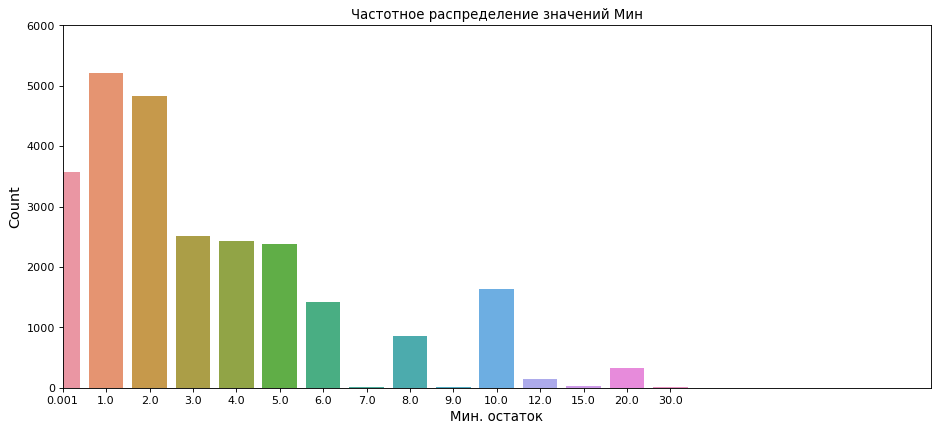

In [934]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
plt.title('Частотное распределение значений Мин')
plt.xlabel('Мин. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.axis([0, 20, 0, 6000])
plt.show()


#fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
#plt.xlabel('Мин. остаток', fontsize=12)
#plt.ylabel('Count', fontsize=13)
#plt.axis([21, 35, 0, 6000])
#plt.show()

In [935]:
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts())
qual_min = len(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts()) # для метрик вводим переменную
print(qual_min)
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts().sum())

1.000     5216
2.000     4826
0.001     3573
3.000     2506
4.000     2428
5.000     2376
10.000    1640
6.000     1413
8.000      854
20.000     320
12.000     141
15.000      22
9.000       18
7.000       14
30.000      12
Name: МинимальныйСтраховойЗапас, dtype: int64
15
25359


In [936]:
qual_min

15

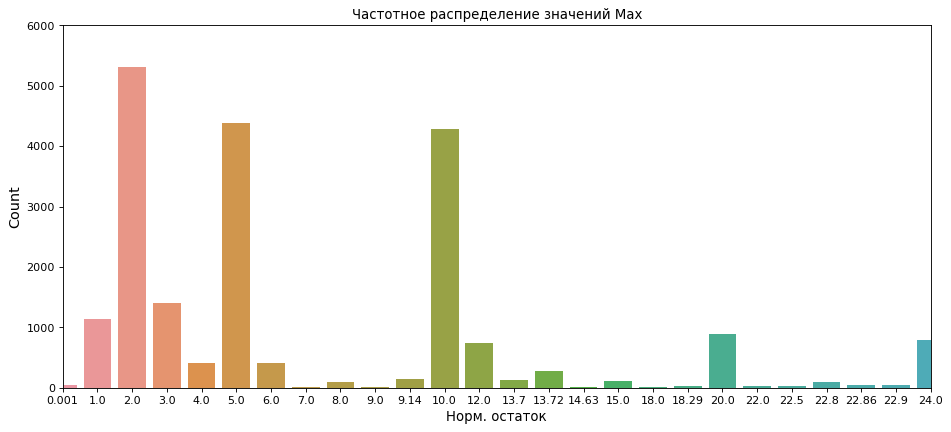

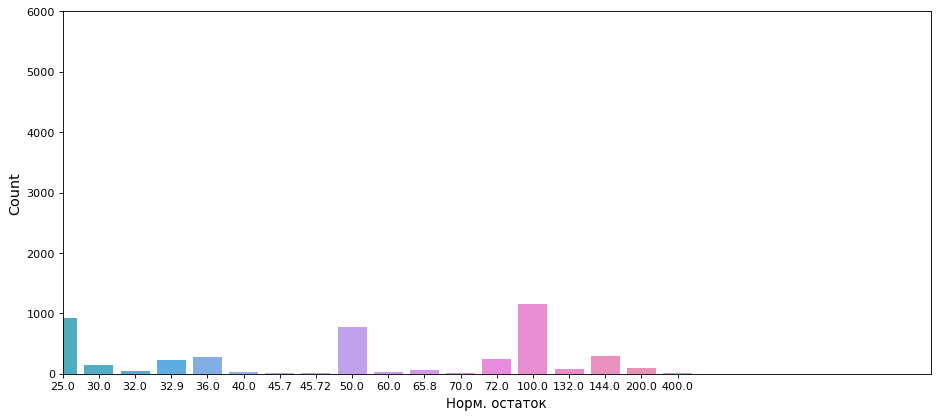

In [937]:
# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.title('Частотное распределение значений Мах')
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#ax.set(xlim=(0, 300))
plt.axis([0.0, 25, 0, 6000])
#ax.set_xticklabels(range(0,50))
plt.show()


# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#plt.xticks(y_filter.loc[:, 'Нормативный остаток'])
#ax.set(xlim=(0, 100))
plt.axis([26, 50, 0, 6000])
# ax.set_xticklabels(range(0,50))
plt.show()


In [938]:
print(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts().head(60))
qual_max = len(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts()) # для метрик вводим переменную
print(qual_max)

2.000      5304
5.000      4385
10.000     4290
3.000      1402
100.000    1161
1.000      1146
25.000      931
20.000      891
24.000      788
50.000      776
12.000      742
6.000       416
4.000       405
144.000     290
36.000      277
13.720      271
72.000      250
32.900      224
30.000      148
9.140       144
13.700      132
15.000      109
8.000       102
22.800      101
200.000      92
132.000      80
65.800       58
22.860       53
22.900       52
32.000       44
0.001        41
22.500       32
40.000       30
60.000       29
22.000       28
18.290       25
18.000       19
7.000        18
14.630       17
45.700       14
400.000      12
45.720       11
9.000        11
70.000        8
Name: ЗначениеТочкиЗаказа, dtype: int64
44


#### Создаем Pipeline

In [939]:
le_min = LabelEncoder()  #Делаем label encoding
le_max = LabelEncoder()

y_filter_min_le = le_min.fit_transform(y_filter_min)
y_filter_max_le = le_max.fit_transform(y_filter_max)

In [940]:
# pickle 
#pickle.dump(data_transformer_1, open('le_min.pk', 'wb'))   не понятно, зачем делал этот блок строк??
#pickle.dump(data_transformer_2, open('le_max.pk', 'wb'))

In [941]:
len(y_filter_min_le)

25359

In [942]:
len(set(y_filter_min))

15

In [943]:
# Начнем трансформировать колонки, в зависимости от типа значений:
categorical_features = X_filter.select_dtypes(include=[object])

In [944]:
categorical_features = categorical_features.drop(['Номенклатура', 'Код' ], axis=1) # ненужно для обучения
categorical_features[categorical_features['КатегорияТовараАйриса'] == "A"]

,ГруппаНоменклатуры,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
42,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
44,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
49,Разное,упак (4шт),Регулярный,NaN,A,Лукьянова Ольга Александровна(ИП)
50,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
342,Prym,пар,Регулярный,A,A,Prym Consumer Europe GmbH - ПРИМ (Германия)
...,...,...,...,...,...,...
50683,Цепи,м,Регулярный,A,A,Китай Yuantong
50684,Цепи,м,Регулярный,A,A,Китай Yuantong
50686,Цепи,м,Регулярный,A,A,Китай Yuantong
50687,Цепи,м,Регулярный,A,A,Китай Yuantong


In [945]:
numerical_features = X_filter.select_dtypes(include=[np.number])

In [946]:
numerical_features = numerical_features.drop(['НомерСтроки', 'Артикул', 'КодХарактеристики'], axis=1) # ненужно для обучения
numerical_features

,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена
10,1.00,1.0,0.00,65.0,0.0,0,0,0,41.00,19.60
11,1.00,1.0,0.00,93.0,0.0,0,0,0,65.00,30.87
12,1.00,1.0,0.00,99.0,0.0,0,0,0,39.00,33.12
13,1.00,1.0,0.00,118.0,0.0,0,0,0,55.00,41.00
14,1.00,1.0,0.00,78.0,0.0,0,0,0,20.00,23.52
...,...,...,...,...,...,...,...,...,...,...
50741,13.71,1.0,0.32,26.0,4.3,3,2,409,51.77,11.40
50750,50.00,1.0,0.00,34.0,0.0,0,0,0,0.00,12.77
50751,50.00,1.0,0.00,34.0,0.0,0,0,0,0.00,12.77
50755,1.00,1.0,0.00,37.0,0.0,0,0,0,0.00,15.99


In [947]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25359 entries, 10 to 50794
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ОптоваяФасовкаАйрис       25359 non-null  float64
 1   КоэффициентЕдиницы        25359 non-null  float64
 2   СредниеПродажи            25359 non-null  float64
 3   Цена                      25359 non-null  float64
 4   ПроданоВсего              25359 non-null  float64
 5   КоличествоСделок          25359 non-null  int64  
 6   КоличествоПериодовПродаж  25359 non-null  int64  
 7   КоличествоДнейНаСкладе    25359 non-null  int64  
 8   ЗакупкаЗаПериод           25359 non-null  float64
 9   ЗакупочнаяЦена            25359 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.1 MB


In [948]:
len(y_filter_min_le)

25359

In [949]:
# будем вставлять 0
numerical_features_1 = numerical_features[
    ['СредниеПродажи', 'ПроданоВсего','КоличествоСделок', 'КоличествоПериодовПродаж', 'ЗакупкаЗаПериод']
]         
numerical_features_2 = numerical_features.drop(numerical_features_1.columns, axis=1)


In [950]:
# здесь устанавливаем, что заполняем нулями отсутствующ. значения
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant')

In [951]:
# указываем колонки для трансформации (общие и для мин и для мах):
numerical_features_1_col = numerical_features_1.columns  # будем вставлять 0 и производить PolynomialFeatures
numerical_features_2_col = numerical_features_2.columns  # будем только производить PolynomialFeatures
categorical_features_col = categorical_features.columns  # будем производить OHE

# указываем какой препроцессинг будем делать на разных колонках (параметры скалирования зададим непосредств.в grid_search):
numerical_transformer_1 = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
numerical_transformer_2 = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('ОНЕ', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

# создаем общий трансформатор:
data_transformer_1 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

data_transformer_2 = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

In [952]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_filter, y_filter_min_le, test_size=0.33, stratify=y_filter_min_le, random_state=42
)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_filter, y_filter_max_le, test_size=0.33, stratify=y_filter_max_le, random_state=42
)

#### Здесь остановился 08.02.2021

In [953]:
X_train_min_trans = data_transformer_1.fit_transform(X_train_min) # далее обрабатываем трансформированные значения!!
X_train_max_trans = data_transformer_2.fit_transform(X_train_max)

# pickle (сохраняем для быстрой обработки новых значений) (закомментировал пока чтоб не затереть)
pickle.dump(data_transformer_1, open('data_transformer_1.pk', 'wb'))  
pickle.dump(data_transformer_2, open('data_transformer_2.pk', 'wb'))

In [954]:
# load
data_transformer_1 = pickle.load(open('data_transformer_1.pk', 'rb'))
data_transformer_2 = pickle.load(open('data_transformer_2.pk', 'rb'))

In [955]:
#X_train_min_trans = data_transformer_1.fit_transform(X_train_min) # далее обрабатываем трансформированные значения!!
#X_train_max_trans = data_transformer_2.fit_transform(X_train_max)

In [956]:
# pd.DataFrame(X_train_max_trans)

In [957]:
# len(X_train_max_trans[1])

### балансировку делать после расщепления и только для тренировочных данных!!!:

In [958]:
#len(X_filter_trans)

In [959]:
len(y_filter_min_le)

25359

### Наконец то подошли к классификации!!

In [960]:
# 1. обратить внимание на балансировку внутри эстиматора....нужна ли она?
# 2. стандартизация нужна ли для деревьев и леса...и какая? (вроде для деревьев не нужна стандартизация) -УБРАЛ
# 3. Сейчас включен рандом форест на 5ой b 6ой версии))

In [961]:
# RandomForestClassifier
en_RF = Pipeline(
    steps=[('ros', RandomOverSampler(random_state=0)),
           ('RF', RandomForestClassifier(random_state=42, class_weight='balanced'))
          ]
)

In [962]:
# Создаем сетку поиска для RandomForestClassifier:
param_grid_rf = {
    'RF__criterion':['gini','entropy'],
    'RF__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
    #'RF__criterion':['gini'],
    #'RF__max_depth':[30,40,50,70]
}

In [963]:
grid_search_min = GridSearchCV(en_RF, param_grid=param_grid_rf)
grid_search_max = GridSearchCV(en_RF, param_grid=param_grid_rf)

In [ ]:
grid_min = grid_search_min.fit(X_train_min_trans, y_train_min)

In [ ]:
grid_min.best_params_

In [ ]:
grid_max = grid_search_max.fit(X_train_max_trans, y_train_max)

In [ ]:
grid_max.best_params_

In [542]:
# now we  save it to a file:     (закомитил, чтоб случайно не затереть)

with open('min_name.pkl', 'wb') as f:
    pickle.dump(grid_min, f)
    
with open('max_name.pkl', 'wb') as f:
    pickle.dump(grid_max, f)    

In [543]:
# and we can load it:

with open('min_name.pkl', 'rb') as f:
    grid_min_s = pickle.load(f)
    
with open('max_name.pkl', 'rb') as f:
    grid_max_s = pickle.load(f)

In [544]:
X_test_min_trans = data_transformer_1.transform(X_test_min) # не забываем, что используем уже обученную модель на новых быстрых данных
X_test_max_trans = data_transformer_2.transform(X_test_max)

In [545]:
pd.DataFrame(X_test_max_trans)

,0,1,2,3,4,5,6,7,8,9,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032
0,2.540,30.475,6.0,4.0,325.00,77.406500,15.240,10.160,825.500,182.850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067,0.877,1.0,1.0,34.00,0.058759,0.067,0.067,2.278,0.877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000,0.0,0.0,27.00,0.000000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.175,1.754,1.0,1.0,22.00,0.306950,0.175,0.175,3.850,1.754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,21.00,0.000000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,0.000,0.000,0.0,0.0,0.00,0.000000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8219,0.000,0.000,0.0,0.0,0.00,0.000000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8220,0.451,5.857,4.0,3.0,201.00,2.641507,1.804,1.353,90.651,23.428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8221,0.000,0.000,0.0,0.0,1.00,0.000000,0.000,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [546]:
# len(X_train_min_trans[1])

In [547]:
#print(grid_min_s.score(X_train_min_trans, y_train_min))
#print(grid_max_s.score(X_train_max_trans, y_train_max))

In [548]:
# 28.01.2021 Как вариант:сохранять рассчитанные параметры в течение мес для каждого магазина, а обновлять мин-макс 1 раз в неделю

In [549]:
pred_min = grid_min_s.predict(X_test_min_trans)
pred_max = grid_max_s.predict(X_test_max_trans)

In [550]:
# НЕ ЗАБЫТЬ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАН на  ЛЭЙБЛ!!!!(обратное рпеобразование делать после всех метрик, 
# иначе будет выдавать ошибку: continuous is not supported)

In [551]:
pd.DataFrame(X_test_min_trans)

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028
0,0.077,1.000,1.0,1.0,43.00,0.077000,0.077,0.077,3.31100,1.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.0,0.0,50.00,0.000000,0.000,0.000,0.00000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.016,53.017,39.0,9.0,1459.00,212.916272,156.624,36.144,5859.34400,2067.663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.451,18.868,10.0,7.0,160.00,27.377468,14.510,10.157,232.16000,188.680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.0,0.0,10.00,0.000000,0.000,0.000,0.00000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8218,2.043,26.965,21.0,7.0,906.00,55.089495,42.903,14.301,1850.95800,566.265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8219,0.000,0.000,0.0,0.0,1003.00,0.000000,0.000,0.000,0.00000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8220,1.879,24.804,27.0,7.0,425.00,46.606716,50.733,13.153,798.57500,669.708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8221,1.536,20.273,8.0,6.0,170.33,31.139328,12.288,9.216,261.62688,162.184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [552]:
frame_min = [
    pd.DataFrame(pred_min, columns=['predict']), 
    pd.DataFrame(y_test_min, columns=['Минимальный остаток']).reset_index(drop=True), X_test_min[['ОптоваяФасовкаАйрис']].reset_index(drop=True)
]
frame_max = [
    pd.DataFrame(pred_max, columns=['predict']), 
    pd.DataFrame(y_test_max, columns=['Нормативный остаток']).reset_index(drop=True), X_test_max['ОптоваяФасовкаАйрис'].reset_index(drop=True)
]


In [553]:
df3_min = pd.concat(frame_min, axis=1)
df3_max = pd.concat(frame_max, axis=1)

#### Здесь остановился 09.02.2021

In [554]:
df3_min[df3_min['Минимальный остаток']==20] #быстрая оценка признаков

,predict,Минимальный остаток,ОптоваяФасовкаАйрис


In [555]:
# IPython.display.HTML(df3_min.to_html())

In [556]:
# IPython.display.HTML(df3_max.to_html())

#### Посмотрим на метрики на тестовых данных: (не забываем, что у нас закодированные значения!!)

In [557]:
accuracy_score(df3_min['Минимальный остаток'], df3_min['predict'])

0.8315699866228871

In [558]:
accuracy_score(df3_max['Нормативный остаток'], df3_max['predict'])

0.9098869025902955

In [559]:
precision_min, recall_min, fscore_min, support_min = score(df3_min['Минимальный остаток'], df3_min["predict"])
precision_macro_min, recall_macro_min, fscore_macro_min, support_macro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='macro')
precision_micro_min, recall_micro_min, fscore_micro_min, support_micro_min = score(df3_min['Минимальный остаток'], df3_min["predict"], average='micro')



In [560]:
# Проверка на отсутствие какого-либо класса в ПРЕДСКАЗАНИЯХ!! (именно в предсказаниях!!!)
set(df3_min['Минимальный остаток']) - set(df3_min["predict"])

set()

In [561]:
precision_max, recall_max, fscore_max, support_max = score(df3_max['Нормативный остаток'], df3_max["predict"])
precision_macro_max, recall_macro_max, fscore_macro_max, support_macro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='macro')
precision_micro_max, recall_micro_max, fscore_micro_max, support_micro_max = score(df3_max['Нормативный остаток'], df3_max["predict"], average='micro')

In [562]:
score_precision_min = pd.DataFrame((precision_min.reshape(qual_min, 1)), columns=['precision_min'])
score_recall_min = pd.DataFrame((recall_min.reshape(qual_min, 1)), columns=['recall_min'])
score_fscore_min = pd.DataFrame((fscore_min.reshape(qual_min, 1)), columns=['fscore_min'])
score_support_min = pd.DataFrame((support_min.reshape(qual_min, 1)), columns=['support_min'])
for_frame_min = [score_precision_min, score_recall_min, score_fscore_min, score_support_min] 
score_all_min = pd.concat(for_frame_min, axis=1)
score_all_min

,precision_min,recall_min,fscore_min,support_min
0,0.831097,0.899231,0.863823,1171
1,0.820887,0.837500,0.829110,1680
2,0.824342,0.801151,0.812581,1564
3,0.857534,0.783479,0.818836,799
4,0.854972,0.800776,0.826987,773
5,0.858032,0.875476,0.866667,787
6,0.801688,0.842572,0.821622,451
7,0.333333,0.125000,0.181818,8
8,0.820789,0.814947,0.817857,281
9,1.000000,0.500000,0.666667,6


In [563]:
score_precision_max = pd.DataFrame((precision_max.reshape(qual_max, 1)), columns=['precision_max'])
score_recall_max = pd.DataFrame((recall_max.reshape(qual_max, 1)), columns=['recall_max'])
score_fscore_max = pd.DataFrame((fscore_max.reshape(qual_max, 1)), columns=['fscore_max'])
score_support_max = pd.DataFrame((support_max.reshape(qual_max, 1)), columns=['support_max'])
for_frame_max = [score_precision_max, score_recall_max, score_fscore_max, score_support_max] 
score_all_max = pd.concat(for_frame_max, axis=1)
score_all_max

,precision_max,recall_max,fscore_max,support_max
0,0.846154,0.785714,0.814815,14
1,0.839572,0.832891,0.836218,377
2,0.857301,0.905374,0.880682,1712
3,0.699769,0.660131,0.679372,459
4,0.845361,0.630769,0.722467,130
5,0.934211,0.927431,0.930808,1378
6,0.945736,0.877698,0.910448,139
7,1.000000,0.142857,0.250000,7
8,0.862069,0.757576,0.806452,33
9,1.000000,1.000000,1.000000,4


In [564]:
print(f'precision_macro_min={precision_macro_min}, recall_macro_min={recall_macro_min},\
 score_macro_min={fscore_macro_min}, support_macro_min={support_macro_min}')

precision_macro_min=0.7890590926500243, recall_macro_min=0.6899944872470664, score_macro_min=0.7237490537755442, support_macro_min=None


In [565]:
print(f'precision_macro_max={precision_macro_max}, recall_macro_max={recall_macro_max},\
 score_macro_max={fscore_macro_max}, support_macro_max={support_macro_max}')

precision_macro_max=0.9542211263935709, recall_macro_max=0.8802770425287185, score_macro_max=0.9056824242785497, support_macro_max=None


In [566]:
print(f'precision_micro_min={precision_micro_min}, recall_micro_min={recall_micro_min},\
 score_micro_min={fscore_micro_min}, support_micro_min={support_micro_min}')

precision_micro_min=0.8315699866228871, recall_micro_min=0.8315699866228871, score_micro_min=0.8315699866228871, support_micro_min=None


In [567]:
print(f'precision_micro_max={precision_micro_max}, recall_micro_max={recall_micro_max},\
 score_micro_max={fscore_micro_max}, support_micro_max={support_micro_max}')

precision_micro_max=0.9098869025902955, recall_micro_max=0.9098869025902955, score_micro_max=0.9098869025902955, support_micro_max=None


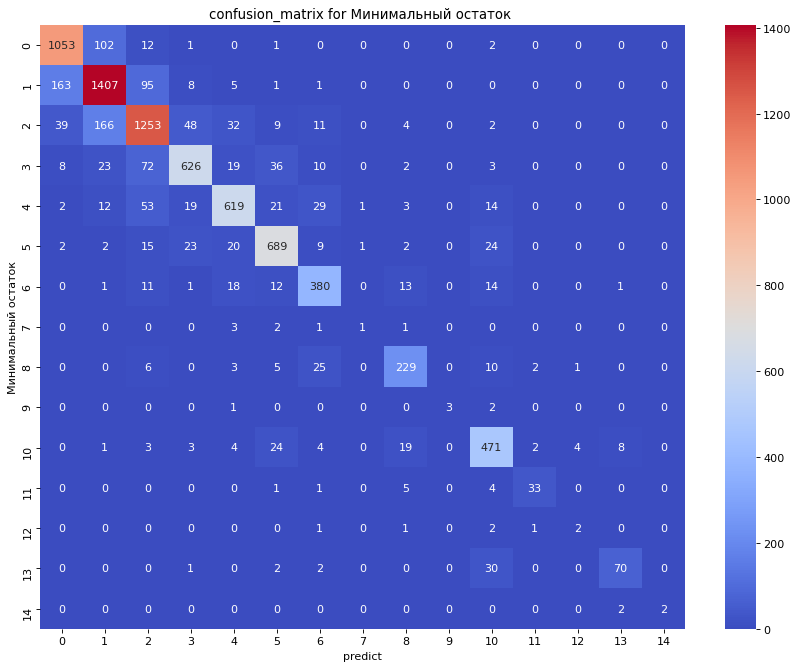

In [568]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_min['Минимальный остаток'], df3_min["predict"],
                               rownames=['Минимальный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Минимальный остаток ')
plt.show()

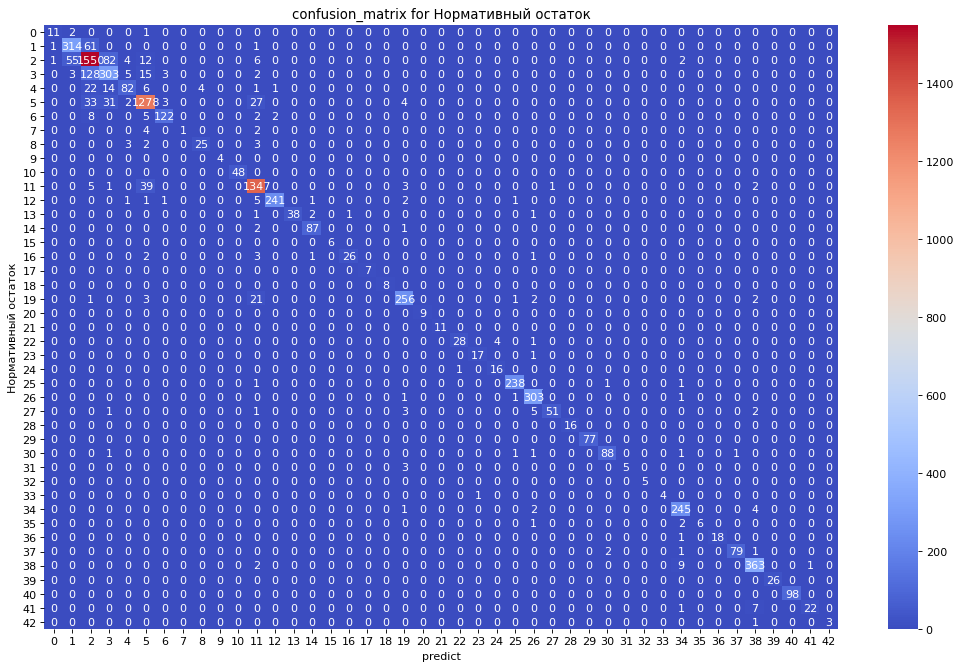

In [569]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_max['Нормативный остаток'], df3_max["predict"],
                               rownames=['Нормативный остаток'], colnames=["predict"])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Нормативный остаток')
plt.show()

In [570]:
confusion_matrix

predict,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
Нормативный остаток,,,,,,,,,,,,,,,,,,,,,
0,11,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,314,61,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,55,1550,82,4,12,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,0,3,128,303,5,15,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,22,14,82,6,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,33,31,2,1278,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,8,0,0,5,122,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,3,2,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0


#### Подготовка к заливке на общий ресурс

In [571]:
df3_min['predict_inv'] = le_min.inverse_transform(df3_min.predict)
df3_max['predict_inv'] = le_max.inverse_transform(df3_max.predict)

df3_min['Минимальный остаток_inv'] = le_min.inverse_transform(df3_min['Минимальный остаток'])
df3_max['Нормативный остаток_inv'] = le_max.inverse_transform(df3_max['Нормативный остаток'])

df3_min['prophet'] = df3_min['predict_inv'] 
df3_max['prophet'] = df3_max[['predict_inv', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [572]:
df3_min[['Минимальный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

,Минимальный остаток_inv,ОптоваяФасовкаАйрис,predict_inv,prophet
0,1.0,1.0,1.0,1.0
1,2.0,1.0,2.0,2.0
2,8.0,10.0,8.0,8.0
3,5.0,10.0,5.0,5.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
8218,3.0,1.0,3.0,3.0
8219,8.0,144.0,8.0,8.0
8220,3.0,1.0,3.0,3.0
8221,10.0,25.0,5.0,5.0


In [573]:
df3_max[['Нормативный остаток_inv', 'ОптоваяФасовкаАйрис', 'predict_inv', 'prophet']]

,Нормативный остаток_inv,ОптоваяФасовкаАйрис,predict_inv,prophet
0,25.0,25.0,25.0,25.0
1,5.0,5.0,5.0,5.0
2,20.0,20.0,20.0,20.0
3,2.0,1.0,2.0,2.0
4,2.0,1.0,2.0,2.0
...,...,...,...,...
8218,100.0,100.0,100.0,100.0
8219,12.0,12.0,12.0,12.0
8220,50.0,50.0,50.0,50.0
8221,2.0,1.0,2.0,2.0


#### Здесь остановился 10.02.2021

In [574]:
# файл заливки:
X_need_min_trans = data_transformer_1.transform(X_need)
X_need_max_trans = data_transformer_2.transform(X_need)


In [575]:
y_pred_need_min = grid_min_s.predict(X_need_min_trans)
y_pred_need_max = grid_max_s.predict(X_need_max_trans)

In [576]:
frame_min_need = [pd.DataFrame(y_pred_need_min, columns=['predict']),
                  pd.DataFrame(X_need[['ОптоваяФасовкаАйрис', 'Артикул', 'Код' , 'КодХарактеристики']].reset_index(drop=True))]
frame_max_need = [pd.DataFrame(y_pred_need_max, columns=['predict']),
                  pd.DataFrame(X_need['ОптоваяФасовкаАйрис'].reset_index(drop=True))]

In [577]:
df4_min = pd.concat(frame_min_need, axis=1)
df4_max = pd.concat(frame_max_need, axis=1)

In [578]:
df4_min['predict_inv_min'] = le_min.inverse_transform(df4_min.predict)
df4_max['predict_inv_max'] = le_max.inverse_transform(df4_max.predict)


In [579]:
df4_min

,predict,ОптоваяФасовкаАйрис,Артикул,Код,КодХарактеристики,predict_inv_min
0,0,1.0,612807,Б/00106004,<NA>,0.001
1,0,1.0,614907,Б/00113850,<NA>,0.001
2,0,1.0,614897,Б/00113840,<NA>,0.001
3,0,1.0,614898,Б/00113841,<NA>,0.001
4,0,1.0,614895,Б/00113838,<NA>,0.001
...,...,...,...,...,...,...
23177,0,1.0,514112,00000044419,9,0.001
23178,0,1.0,7709023,02/00024119,1,0.001
23179,10,20.0,494075,02/00041115,<NA>,10.000
23180,6,20.0,510984,00000068127,<NA>,6.000


In [580]:
df4_max

,predict,ОптоваяФасовкаАйрис,predict_inv_max
0,2,1.0,2.0
1,1,1.0,1.0
2,1,1.0,1.0
3,1,1.0,1.0
4,1,1.0,1.0
...,...,...,...
23177,2,1.0,2.0
23178,2,1.0,2.0
23179,38,20.0,100.0
23180,19,20.0,20.0


In [581]:
df5_all = pd.concat([df4_min[['ОптоваяФасовкаАйрис', 'Артикул', 'Код', 'КодХарактеристики', 'predict_inv_min']] ,
                     df4_max['predict_inv_max']], axis=1)

In [582]:
#df5_all['prophet_predict_inv_max'] = df5_all[['predict_inv_max', 'ОптоваяФасовкаАйрис']].max(axis=1)

In [583]:
df5_all['prophet_predict_inv_max'] = list(map(math.ceil, df5_all['predict_inv_max']/df5_all['ОптоваяФасовкаАйрис']))*df5_all['ОптоваяФасовкаАйрис']

In [584]:
df5_all

,ОптоваяФасовкаАйрис,Артикул,Код,КодХарактеристики,predict_inv_min,predict_inv_max,prophet_predict_inv_max
0,1.0,612807,Б/00106004,<NA>,0.001,2.0,2.0
1,1.0,614907,Б/00113850,<NA>,0.001,1.0,1.0
2,1.0,614897,Б/00113840,<NA>,0.001,1.0,1.0
3,1.0,614898,Б/00113841,<NA>,0.001,1.0,1.0
4,1.0,614895,Б/00113838,<NA>,0.001,1.0,1.0
...,...,...,...,...,...,...,...
23177,1.0,514112,00000044419,9,0.001,2.0,2.0
23178,1.0,7709023,02/00024119,1,0.001,2.0,2.0
23179,20.0,494075,02/00041115,<NA>,10.000,100.0,100.0
23180,20.0,510984,00000068127,<NA>,6.000,20.0,20.0


In [585]:
df5_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23182 entries, 0 to 23181
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ОптоваяФасовкаАйрис      23182 non-null  float64
 1   Артикул                  23182 non-null  Int32  
 2   Код                      23182 non-null  object 
 3   КодХарактеристики        11684 non-null  Int32  
 4   predict_inv_min          23182 non-null  float64
 5   predict_inv_max          23182 non-null  float64
 6   prophet_predict_inv_max  23182 non-null  float64
dtypes: Int32(2), float64(4), object(1)
memory usage: 1.1+ MB


In [586]:
#df5_all.drop(['predict_inv_max'], inplace=True, axis=1)

In [587]:
# IPython.display.HTML(df5_all.to_html())

In [588]:
df5_all = df5_all.drop(['ОптоваяФасовкаАйрис', 'predict_inv_max'], axis=1)


#### 02.03.2021 Нужно округлять до фасовки, чтоб не было 6, когда фасовка 5  (нужно до 10 округлить)

In [589]:
df5_all

,Артикул,Код,КодХарактеристики,predict_inv_min,prophet_predict_inv_max
0,612807,Б/00106004,<NA>,0.001,2.0
1,614907,Б/00113850,<NA>,0.001,1.0
2,614897,Б/00113840,<NA>,0.001,1.0
3,614898,Б/00113841,<NA>,0.001,1.0
4,614895,Б/00113838,<NA>,0.001,1.0
...,...,...,...,...,...
23177,514112,00000044419,9,0.001,2.0
23178,7709023,02/00024119,1,0.001,2.0
23179,494075,02/00041115,<NA>,10.000,100.0
23180,510984,00000068127,<NA>,6.000,20.0


#### Сама заливка

In [590]:
file_name = f'LEN_IN_{dt.today():%d-%m-%Y}'+'.csv'

In [591]:
file_name

'LEN_IN_07-04-2021.csv'

In [592]:
df5_all.to_csv(file_name, sep=',',index=False, encoding='utf8')

In [593]:
ftp = FTP('192.168.50.48')
ftp.login('A.Mochalov','Fktrcfylh1!41')
#encoding = 'cp1251'

'230 User ISK\\a.mochalov logged in.'

In [594]:
ftp.cwd('/IT_obmen/Mochalov') 

'250 CWD command successful.'

In [595]:
with open(file_name, 'rb') as fobj:
            ftp.storbinary('STOR ' + file_name, fobj)

### Комментарии:

In [ ]:
# ОТФИЛЬТРОВАТЬ СТАТУСЫ МАРКЕТ ПЛЕЙС (НАШ), ИСКЛЮЧЕННЫЙ (АЙРИС) ??????????

In [ ]:
#df3_min['prophet'] = df3_min['predict']    # 'это только для МИНИМАЛЬНОГО остатка !!!'
# df3_max['prophet'] = df3_max[['predict', 'Фасовка айрис']].max(axis=1)    # 'это только для НОРМАТИВНОГО остатка !!!'
#df3_max['prophet'] = df3_max['predict'] # т.к. было преобразование в label!!!! (иначе бы использовали строку выше)

In [ ]:
# ЧТОЬ НЕ ЗАБЫТЬ:

## xgb_clf почитать о ней


# КАК ВАРИАНТ-ИСПОЛЬЗОВАТЬ МИН(МАКС) ИЛИ МАКС(МИН) КАК ЕЩЕ ОДИН ПРИЗНАК ДЛЯ РАССЧЕТА МАКС(МИН) ИЛИ МИН(МАКС)!!!!!!

In [ ]:
# 1. Поработать с дисбалансом до testsplit (чтоб заработала стратификация)
# 2. Поигарть с метриками как в папке  MIN-MAX
# 3. Советуют попробовать так же MSE метрику (настойчиво советуют)
# 4. Добавить колонку  минимальный остаток, чтоб понимать по каким мин у нас проваливаются метрики
# 5. Может сравнение все же делать с данными без балансировки??

In [ ]:
##rfmSegmentation.to_csv('rfm-table_mark.csv', sep=';')

In [ ]:
### неплохая задумка:
### metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

In [ ]:
### Выкладывать под определенными префиксами например : len-in-12/08/2021
### От меня: len-out-14/08/2021

In [ ]:
### 18/02/2021 если мы берем новый блок данных и пытаемся его натянуть на предыдущие значения, трансформировать тоже нужно
### трансформировать тоже нужно про предыдущим значениям, - иначе будет выскакивать ошибка о несоответсвии кол-ва признаков:
###  Number of features of the model must match the input. Model n_features is 1046 and input n_features is 1031
### и так же записывать с помощью pickle!!!!!